<a href="https://colab.research.google.com/github/raihanhd12/PCVK_Genap_2023/blob/main/Minggu%2016/Rice%20leaf%20Disease%20Detection%20RHD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <span style="font-family:Copperplate Gothic"><u>Rice Leaf Disease Detection</u></span> 

> ``Team Member 1``
     
| Profile Information    :|                            | 
|---                     |---                                 |
|Person Name  →          |<b>Muhammad Al Kausar Ramadhan</b>             |
|NIM       →          |2041720193           |
|Roll Number →        |11   |

---

> ``Team Member 2``
     
| Profile Information    :|                            | 
|---                     |---                                 |
|Person Name  →          |<b>Raihan Hidayatullah Djunaedi</b>             |
|NIM       →          |2041710108          |
|Roll Number →        |14   |

---

### <span style="font-family:cursive"><u>Summary </u></span>

>#### <span style="font-family:cursive"> About Dataset  </span> 

- This dataset contains 120 jpg images of disease infected rice leaves. The images are grouped into 3 classes based on the type of disease. There are 40 images in each class.

 - [X] Classes<br>
    - [x] Leaf smut
    - [x] Brown spot
    - [x] Bacterial leaf blight

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


>#### <span style="font-family:cursive"> Needed Library Requried  </span> 

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import cv2

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from tensorflow.keras.preprocessing.image import load_img, img_to_array

from sklearn.metrics import confusion_matrix

#for fast and memory efficient iterations
import itertools
from sklearn.metrics import classification_report

#to copy the content of the source file to the destination file or directory
import shutil

# to Visualations 
import matplotlib.pyplot as plt
%matplotlib inline

# To Avoid The Warnings
import warnings
warnings.filterwarnings('ignore')

# Advanced Library to enhance the Image processing
import albumentations as albu
from albumentations import Compose, ShiftScaleRotate, Resize


In [ ]:
# Creating the Ratio For Image:- ht,wt,image channel(bgr)
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
IMAGE_CHANNELS = 3

In [ ]:
#Source Directory(Our Data)
os.listdir('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images_old/Rice Leaf Disease')

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

>#### <span style="font-family:cursive"> Preparing The Dataset</span> 
     Creating The Dataframe Containing all the Images
     Creating The 3 List Of Classes

In [ ]:
bacterial_leaf_blight_list = os.listdir('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images_old/Rice Leaf Disease/Bacterial leaf blight')
brown_spot_list = os.listdir('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images_old/Rice Leaf Disease/Brown spot')
leaf_smut_list = os.listdir('/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images_old/Rice Leaf Disease/Leaf smut')

print(len(bacterial_leaf_blight_list))
print(len(brown_spot_list))
print(len(leaf_smut_list))
print('Successfully Created....!')

40
40
40
Successfully Created....!


 
#### <span style="color:Red"> Creating the validation sets</span>

In [ ]:
df_bacterial_leaf_blight = pd.DataFrame(bacterial_leaf_blight_list, columns=['image'])
df_bacterial_leaf_blight['target'] = 'bacterial_leaf_blight'


df_brown_spot = pd.DataFrame(brown_spot_list, columns=['image'])
df_brown_spot['target'] = 'brown_spot'


df_leaf_smut = pd.DataFrame(leaf_smut_list, columns=['image'])
df_leaf_smut['target'] = 'leaf_smut'



df_leaf_smut_val = df_leaf_smut.sample(n=5, random_state=50)
df_brown_spot_val = df_brown_spot.sample(n=5, random_state=50)
df_bacterial_leaf_blight_val = df_bacterial_leaf_blight.sample(n=5, random_state=50)
# Sample 5 validation images from each class
#We tried with taking diff no.of samples(7,8,10) and random_state(101,70,37,88,etc), 
#we got the best values for accuracy when n=5,random_ste=50

print(len(df_bacterial_leaf_blight_val))
print(len(df_brown_spot_val))
print(len(df_leaf_smut_val))

5
5
5


#### <span style="color:Red"> Creating The Training Set for Each Class</span>

In [ ]:
# get a list of val images
val_list = list(df_bacterial_leaf_blight_val['image'])
# filter out the val images
df_bacterial_leaf_blight_train =df_bacterial_leaf_blight[~df_bacterial_leaf_blight['image'].isin(val_list)] # ~ means notin

In [ ]:
# get a list of val images
val_list = list(df_brown_spot_val['image'])
# filter out the val images
df_brown_spot_train = df_brown_spot[~df_brown_spot['image'].isin(val_list)] # ~ means notin

In [ ]:
# get a list of val images
val_list = list(df_leaf_smut_val['image'])
# filter out the val images
df_leaf_smut_train = df_leaf_smut[~df_leaf_smut['image'].isin(val_list)] # ~ means notin


print(len(df_bacterial_leaf_blight_train))
print(len(df_brown_spot_train))
print(len(df_leaf_smut_train))

35
35
35


#### <span style="color:Red">Creating the dataframe for "Data", "Train", and "Validation", by resetting the index accordingly</span>

In [ ]:
df_data = pd.concat([ df_bacterial_leaf_blight,df_brown_spot,df_leaf_smut],
                    axis=0).reset_index(drop=True)

df_train = pd.concat([df_bacterial_leaf_blight_train,df_brown_spot_train,df_leaf_smut_train],
                     axis=0).reset_index(drop=True)

df_val = pd.concat([df_bacterial_leaf_blight_val,df_brown_spot_val,df_leaf_smut_val],
                   axis=0).reset_index(drop=True)

In [ ]:
#shuffle() is being used for shuffling the batch_sized chunks.It has no effect on steps_per_epoch when it is not NULL.
df_data = shuffle(df_data)
df_train = shuffle(df_train)
df_val = shuffle(df_val)

print("Actual Data :- ",df_data.shape)
print("Training Data: -",df_train.shape)
print("Validation Data :- ",df_val.shape)

Actual Data :-  (120, 2)
Training Data: - (105, 2)
Validation Data :-  (15, 2)


#### <span style="font-family:cursive"> Checking the value_counts</span>

In [ ]:
pd.DataFrame(df_data['target'].value_counts())

,target
leaf_smut,40
brown_spot,40
bacterial_leaf_blight,40


In [ ]:
pd.DataFrame(df_train['target'].value_counts())

,target
bacterial_leaf_blight,35
leaf_smut,35
brown_spot,35


In [ ]:
pd.DataFrame(df_val['target'].value_counts())

,target
leaf_smut,5
bacterial_leaf_blight,5
brown_spot,5


#### <span style="font-family:cursive"> <u>Pre-processing The Dataset</u></span>
<span style="color:Red"> Transform the targetHere we will do one hot encoding to the target classes.</span>


In [ ]:
val_len = len(df_val)
train_len = len(df_train)

df_combined =  pd.concat(objs=[df_val, df_train], axis=0).reset_index(drop=True)


# create the dummy variables

df_combined = pd.get_dummies(df_combined, columns=['target']).reset_index(drop=True)

# separate the train and val sets

val_len = len(df_val)
train_len = len(df_train)

df_val = df_combined[:val_len]
df_train = df_combined[val_len:]


print(df_train.shape)
print(df_val.shape)

(105, 4)
(15, 4)


> #### <span style="font-family:cursive"> Basic Check</span>

In [ ]:
df_combined.head()

,image,target_bacterial_leaf_blight,target_brown_spot,target_leaf_smut
0,DSC_0316.JPG,0,0,1
1,DSC_0403.JPG,1,0,0
2,DSC_0398.JPG,1,0,0
3,DSC_0293.JPG,0,0,1
4,DSC_0378.JPG,1,0,0


In [ ]:
df_train.head()

,image,target_bacterial_leaf_blight,target_brown_spot,target_leaf_smut
15,DSC_0702.jpg,1,0,0
16,DSC_0700.jpg,1,0,0
17,DSC_0399.JPG,1,0,0
18,DSC_0338.JPG,0,0,1
19,DSC_0391.jpg,0,1,0


In [ ]:
df_val.head()

,image,target_bacterial_leaf_blight,target_brown_spot,target_leaf_smut
0,DSC_0316.JPG,0,0,1
1,DSC_0403.JPG,1,0,0
2,DSC_0398.JPG,1,0,0
3,DSC_0293.JPG,0,0,1
4,DSC_0378.JPG,1,0,0


> #### <span style="font-family:cursive">  Saving the dataframes as compressed csv files </span>
<div class="alert alert-block alert-warning"> <b>Note</b><br>
    → These csv files will allow us to use Pandas chunking to feed images into the generators.. <br>  
</div>

In [ ]:
df_combined.to_csv('df_combined.csv.gz', compression='gzip', index=False)
df_train.to_csv('df_train.csv.gz', compression='gzip', index=False)
df_val.to_csv('df_val.csv.gz', compression='gzip', index=False)

> ` Move all images to the same folder`

In [ ]:
import os
os.system("rm -rf /content/image_dir")

0

In [ ]:
# Create a new directory
image_dir = 'image_dir'
os.mkdir(image_dir)

- [X] moving all image to created folders

In [ ]:
# Transfer the bacterial_leaf_blight images
for fname in bacterial_leaf_blight_list:
    
    path = '/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images_old/Rice Leaf Disease/Bacterial leaf blight'
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)

In [ ]:
# Transfer the brown_spot images
for fname in brown_spot_list:
    
    path = '/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images_old/Rice Leaf Disease/Brown spot'
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)

In [ ]:
# Transfer the leaf_smut images
for fname in leaf_smut_list:
    
    path = '/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images_old/Rice Leaf Disease/Leaf smut'
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)

> ` Checking How many Images Are in The we created the image_dir`

In [ ]:
len(os.listdir('image_dir'))

120

> <b>Visualization:-</b>  
 `Displaying The Images of some Class`

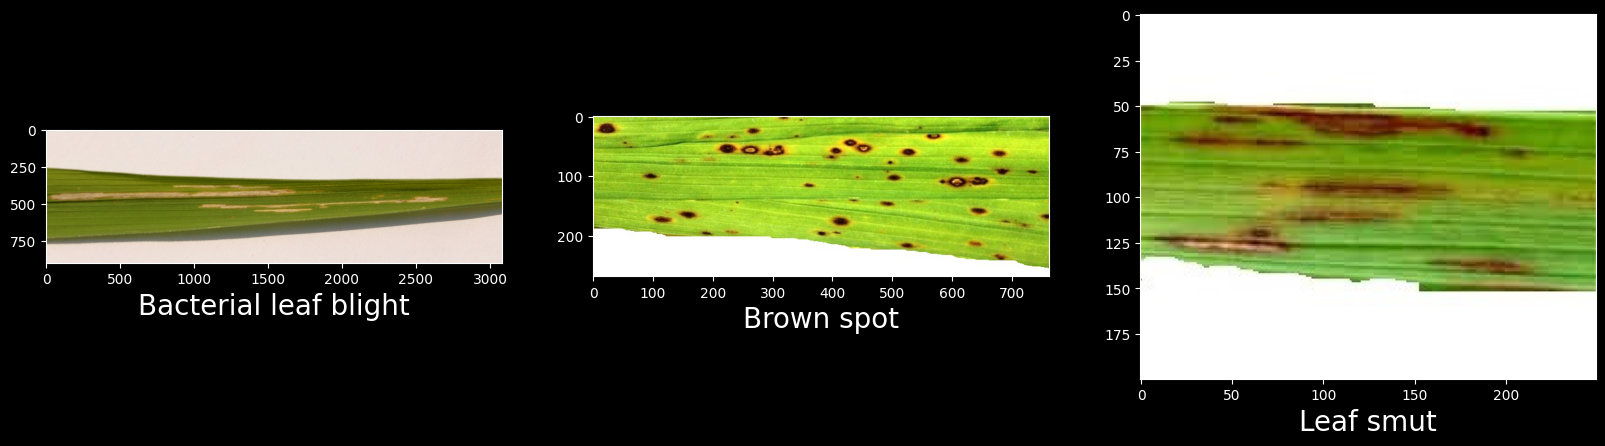

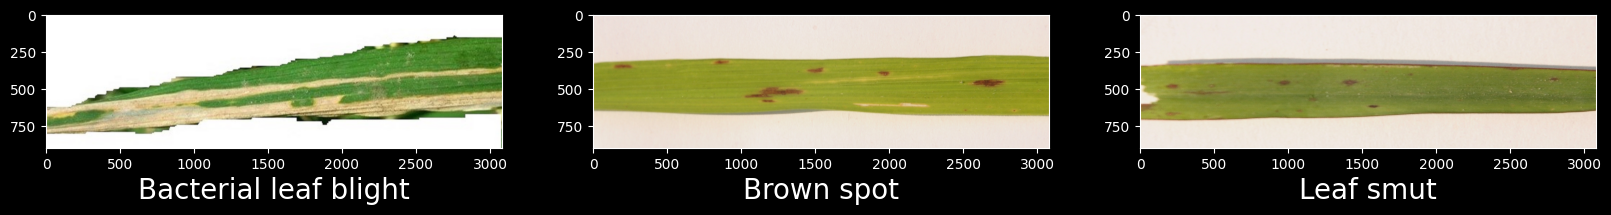

In [ ]:
# set up the canvas for the subplots
plt.style.use('dark_background')
plt.figure(figsize=(20,20))

# Image 1
plt.subplot(1,3,1)   # 1 row and 3 columns
item = 'DSC_0402.JPG'
path = '/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images_old/Rice Leaf Disease/Bacterial leaf blight/' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Bacterial leaf blight', fontsize=20)

# Image 2
plt.subplot(1,3,2)   # 1 row and 3 columns
item = 'DSC_0108.jpg'
path = '/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images_old/Rice Leaf Disease/Brown spot/' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Brown spot', fontsize=20)


# Image 3
plt.subplot(1,3,3)   # 1 row and 3 columns
item = 'DSC_0512.jpg'
path = '/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images_old/Rice Leaf Disease/Leaf smut/' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Leaf smut', fontsize=20)

#------------------------------------------------------------------------------------------------------------------------------#

# set up the canvas for the subplots
plt.figure(figsize=(20,20))

# Image 1
plt.subplot(1,3,1)   # 1 row and 3 columns
item = 'DSC_0702.jpg'
path = '/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images_old/Rice Leaf Disease/Bacterial leaf blight/' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Bacterial leaf blight', fontsize=20)

# Image 2
plt.subplot(1,3,2)   # 1 row and 3 columns
item = 'DSC_0303.JPG'
path = '/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images_old/Rice Leaf Disease/Brown spot/' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Brown spot', fontsize=20)

# Image 3
plt.subplot(1,3,3)   # 1 row and 3 columns
item = 'DSC_0316.JPG'
path = '/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images_old/Rice Leaf Disease/Leaf smut/' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Leaf smut', fontsize=20)


plt.show()

> ## <span style="font-family:cursive">Setting up and test the Augmentations </span>
<div class="alert alert-block alert-warning"> <b>Note</b><br>
    → <b>Data Augmentation</b>- We used this technique to increase the amount of data by adding slightly 
    modified  copies of already existing data or newly created synthetic data from existing data as our dataset is small..<br>
    →  We have used <b>Albumentations</b> library because it helps in fast and flexible  data augmentation. <br>  
</div>

<div class="alert alert-block alert-info"> <b>Albumentation library is better as:- </b><br>
     <b>1.Performance:</b>-Albumentations delivers the best performance on most of the commonly used augmentations.
    It does this by wrapping several low-level image manipulation libraries and selects the fastest implementation.<br>
     <b>2.Variety:</b>- This library not only contains the common image manipulation techniques but a wide variety
    of image transforms.This is helpful for the task and domain-specific applications. <br> 
     <b>3.Flexibility:</b>- Because this package is fairly new, there are multiple image transformations that are proposed and the package has to undergo these changes. But, albumentation has proven to be quite flexible in research and is easily adaptable to the changes. 
</div>

In [ ]:
def augment_image(augmentation, image):
    
    # get the transform as a dict
    aug_image_dict =  augmentation(image=image)
    # retrieve the augmented matrix of the image
    image_matrix = aug_image_dict['image']
    return image_matrix

- [X] Defining The transform parameters 

In [ ]:
aug_types = albu.Compose([
            albu.HorizontalFlip(),              #rotating the input by 180 degrees horizontally
             albu.OneOf([
                albu.HorizontalFlip(),
                albu.VerticalFlip(),            #rotating the input by 180 degrees vertically
                ], p=0.8),                      #p=probability of applying the transform.
            albu.OneOf([
                albu.RandomContrast(), 
                albu.RandomGamma(),             #Also used to adjust the degree of contrast within the image for better view. 
                albu.RandomBrightness(),
                ], p=0.3),                     
            albu.OneOf([
                albu.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),  #Transformation of pixels 
                albu.GridDistortion(),                     #image warping technique which makes changes to the grid structure
                albu.OpticalDistortion(distort_limit=2, shift_limit=0.5), # This distort certain elemnts in the image.
                ], p=0.3),
            albu.ShiftScaleRotate()
            ])

> #### <span style="color:Green"> Getting an image to test transformations </span>

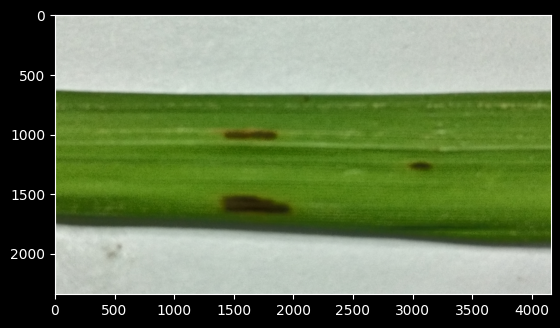

In [ ]:
# get a list of train png images
path = 'image_dir/'
image_list = os.listdir('image_dir')

fname = image_list[1]
image_path = path + fname

image = plt.imread(image_path)
plt.imshow(image)
plt.show()

> #### <span style="color:Green">Test the transformation setup</span>

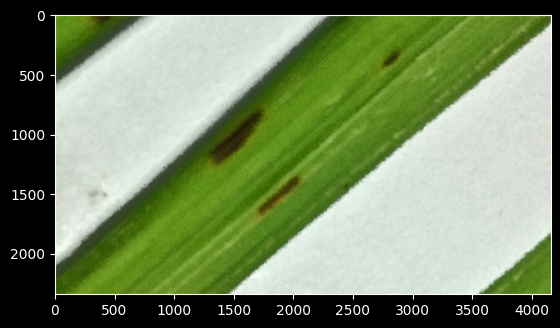

In [ ]:
# The image will be different each time this cell is run.
aug_image = augment_image(aug_types, image)
plt.imshow(aug_image)
plt.show()

> ## <span style="color:Purple">Building the Data Generators </span>

#### → Train Generator

In [ ]:
df_train.head()

,image,target_bacterial_leaf_blight,target_brown_spot,target_leaf_smut
15,DSC_0702.jpg,1,0,0
16,DSC_0700.jpg,1,0,0
17,DSC_0399.JPG,1,0,0
18,DSC_0338.JPG,0,0,1
19,DSC_0391.jpg,0,1,0


- Building the function

In [ ]:
def train_generator(batch_size=8):
    
    while True:
        
        # load the data in chunks (batches)
        for df in pd.read_csv('df_train.csv.gz', chunksize=batch_size):
            
            # get the list of images
            image_id_list = list(df['image'])
            
            # Create empty X matrix - 3 channels
            X_train = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS))
            

            # Create X_train
            #================
            
            for i in range(0, len(image_id_list)):
              
              
                # get the image and mask
                image_id = image_id_list[i]


                # set the path to the image
                path = 'image_dir/' + image_id

                # read the image
                image = cv2.imread(path)
                
                # convert to from BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))
                
                       
            # Augment the image and mask
            # ===========================

                aug_image = augment_image(aug_types, image)
              
                # insert the image into X_train
                X_train[i] = aug_image
              

            
            
            # Create y_train
            # ===============
                cols = ['target_bacterial_leaf_blight', 'target_brown_spot', 'target_leaf_smut']
                y_train = df[cols]
                y_train = np.asarray(y_train) 
       
            # Normalize the images
            X_train = X_train/255         
                          
                
           
            yield X_train, y_train

In [ ]:
# Test the generator

# initialize
train_gen = train_generator(batch_size=8)

# run the generator
X_train, y_train = next(train_gen)

print(X_train.shape)
print(y_train.shape)

(8, 224, 224, 3)
(8, 3)


<div class="alert alert-block alert-danger"> <b>Important Note:-</b><br>
    Remember that train images have been augmented.
</div>

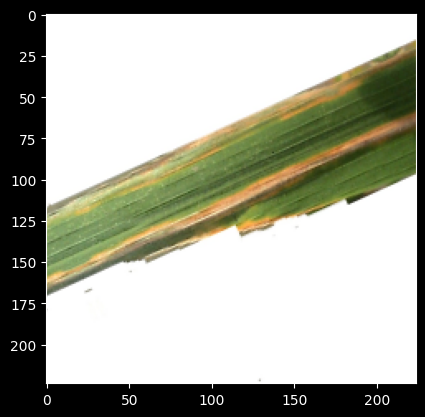

In [ ]:
# Print an image in X_train
image = X_train[1,:,:,:]
plt.imshow(image)
plt.show()

#### → Val Generator

In [ ]:
def val_generator(batch_size=5):
    
    while True:
        
        # load the data in chunks (batches)
        for df in pd.read_csv('df_val.csv.gz', chunksize=batch_size):
            
            # get the list of images
            image_id_list = list(df['image'])
            
            # Create empty X matrix - 3 channels
            X_val = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)
            

        
            
            # Create X_val
            #================
            
            for i in range(0, len(image_id_list)):
              
              
                # get the image and mask
                image_id = image_id_list[i]


                # set the path to the image
                path = 'image_dir/' + image_id

                # read the image
                image = cv2.imread(path)
                
                # convert to from BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))

                # insert the image into X_train
                X_val[i] = image
                
                
            
            
            # Create y_val
            # ===============

                cols = ['target_bacterial_leaf_blight', 'target_brown_spot', 'target_leaf_smut']
                y_val = df[cols]
                y_val = np.asarray(y_val)
         
            # Normalize the images
            X_val = X_val/255

            yield X_val, y_val

In [ ]:
# Test the generator

# initialize
val_gen = val_generator(batch_size=5)

# run the generator
X_val, y_val = next(val_gen)

print(X_val.shape)
print(y_val.shape)

(5, 224, 224, 3)
(5, 3)


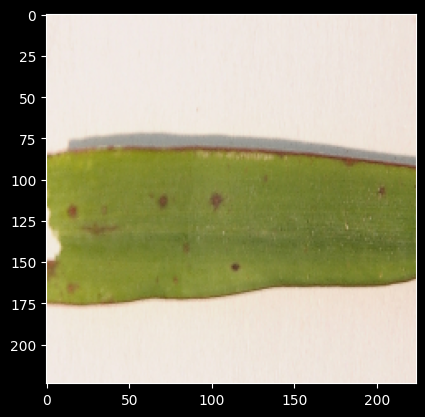

In [ ]:
# print an image from X_val
image = X_val[0,:,:,:]
plt.imshow(image)
plt.show()

#### → Test Generator

In [ ]:
def test_generator(batch_size=1):
    
    while True:
        
        # load the data in chunks (batches)
        for df in pd.read_csv('df_val.csv.gz', chunksize=batch_size):
            
            # get the list of images
            image_id_list = list(df['image'])
            
            # Create empty X matrix - 3 channels
            X_test = np.zeros((len(df), IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS), dtype=np.uint8)
            

        
            
            # Create X_test
            #================
            
            for i in range(0, len(image_id_list)):
              
              
                # get the image and mask
                image_id = image_id_list[i]


                # set the path to the image
                path = 'image_dir/' + image_id

                # read the image
                image = cv2.imread(path)
                
                # convert to from BGR to RGB
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # resize the image
                image = cv2.resize(image, (IMAGE_HEIGHT, IMAGE_WIDTH))

                # insert the image into X_train
                X_test[i] = image
                
                 
                
            # Normalize the images
            X_test = X_test/255

            yield X_test

In [ ]:
# Test the generator

# initialize
test_gen = test_generator(batch_size=1)

# run the generator
X_test = next(test_gen)

print(X_test.shape)

(1, 224, 224, 3)


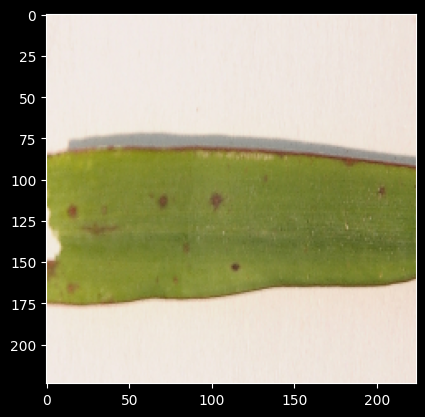

In [ ]:
# print an image from X_test
image = X_test[0,:,:,:]
plt.imshow(image)
plt.show()

> ## <span style="color:Purple">Model Building Architecture </span>

<div class="alert alert-block alert-info"> <b>We have used MobileNet as our model instead of Sequential due to the following reasons:</b><br>
    1)MobileNet uses depthwise separable convolutions. It significantly reduces the number of parameters
    when compared to the network with regular convolutions with the same depth in the nets.This results in lightweight deep neural networks. <br>
    2)MobileNet is a class of CNN that gives us an excellent starting point for training our classifiers that are insanely small and insanely fast. <br>  
</div>

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.metrics import categorical_accuracy

from tensorflow.keras.callbacks import (EarlyStopping, ReduceLROnPlateau, 
                                        ModelCheckpoint,LearningRateScheduler)

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
model = MobileNet(weights='imagenet')
x = model.output

# Create a new dense layer for predictions
# 3 corresponds to the number of classes
predictions = Dense(3, activation='softmax')(x)

# inputs=model.input selects the input layer, outputs=predictions refers to the
# dense layer we created above.

model = Model(inputs=model.input, outputs=predictions)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

### <span style="color:purple"> Train The Model </span>

In [ ]:
TRAIN_BATCH_SIZE = 8
VAL_BATCH_SIZE = 5

num_train_samples = len(df_train)
num_val_samples = len(df_val)
train_batch_size = TRAIN_BATCH_SIZE
val_batch_size = VAL_BATCH_SIZE

# determine numtrain steps
train_steps = np.ceil(num_train_samples / train_batch_size)
# determine num val steps
val_steps = np.ceil(num_val_samples / val_batch_size)

In [ ]:
# Initialize the generators
train_gen = train_generator(batch_size=TRAIN_BATCH_SIZE)
val_gen = val_generator(batch_size=VAL_BATCH_SIZE)

model.compile(
    Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)



filepath = "leaf.h5"

#earlystopper = EarlyStopping(patience=10, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,save_best_only=True, mode='max')

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2,verbose=1, mode='min')

callbacks_list = [checkpoint]

history = model.fit_generator(train_gen, steps_per_epoch=train_steps, epochs=15, 
                              validation_data=val_gen, validation_steps=val_steps,
                             verbose=1,
                             callbacks=callbacks_list)

Epoch 1/15
14/14 [==============================] - ETA: 0s - loss: 1.0922 - accuracy: 0.4286
Epoch 1: val_accuracy improved from -inf to 0.53333, saving model to leaf.h5
14/14 [==============================] - 24s 372ms/step - loss: 1.0922 - accuracy: 0.4286 - val_loss: 1.0871 - val_accuracy: 0.5333
Epoch 2/15
13/14 [==========================>...] - ETA: 0s - loss: 1.0786 - accuracy: 0.7500
Epoch 2: val_accuracy improved from 0.53333 to 0.80000, saving model to leaf.h5
14/14 [==============================] - 5s 393ms/step - loss: 1.0787 - accuracy: 0.7524 - val_loss: 1.0770 - val_accuracy: 0.8000
Epoch 3/15
13/14 [==========================>...] - ETA: 0s - loss: 1.0724 - accuracy: 0.7596
Epoch 3: val_accuracy improved from 0.80000 to 0.86667, saving model to leaf.h5
14/14 [==============================] - 4s 310ms/step - loss: 1.0726 - accuracy: 0.7619 - val_loss: 1.0663 - val_accuracy: 0.8667
Epoch 4/15
13/14 [==========================>...] - ETA: 0s - loss: 1.0673 - accuracy: 

### <span style="color:purple">Evaluate the model on the val set </span>

In [ ]:
# get the metric names so we can use evaulate_generator
model.metrics_names

['loss', 'accuracy']

- [X] Loading the your train model

In [ ]:
model.load_weights('leaf.h5')

val_gen = val_generator(batch_size=1)

val_loss, val_acc =model.evaluate_generator(val_gen,steps=len(df_val))
# Val_gen = 15 steps

print('val_loss:', val_loss)
print('val_acc:', val_acc)

val_loss: 1.0597262382507324
val_acc: 0.9333333373069763


### <span style="color:purple"> Potting The Curves </span>

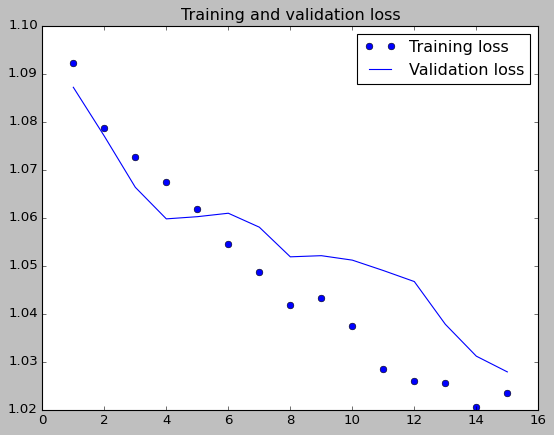

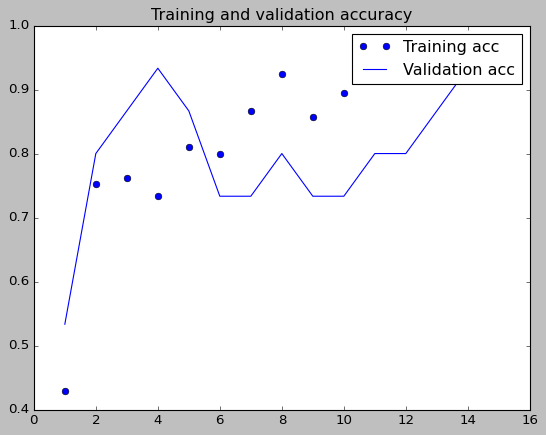

<Figure size 640x480 with 0 Axes>

In [ ]:
# display the loss and accuracy curves
plt.style.use('classic')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.show()

#### We can see from the graph that the loss is decreasing and the accuracy is increasing with the increase in the epochs


## Make a prediction on the val set

In [ ]:
test_gen = test_generator(batch_size=1)

preds = model.predict_generator(test_gen, steps=len(df_val), verbose=1)

15/15 [==============================] - 1s 27ms/step


### Get y_pred as index values

In [ ]:
y_pred = np.argmax(preds, axis=1)

y_pred

array([2, 0, 0, 2, 0, 1, 0, 2, 1, 0, 1, 1, 2, 0, 1])

### Get y_true as index values


In [ ]:
cols = ['target_bacterial_leaf_blight', 'target_brown_spot', 'target_leaf_smut']
y_true = df_val[cols]
y_true = np.asarray(y_true) 

y_true = np.argmax(y_true, axis=1)

y_true

array([2, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 1, 2, 0, 1])

### Compare y_true and y_pred

In [ ]:
print(y_pred)
print(y_true)

[2 0 0 2 0 1 0 2 1 0 1 1 2 0 1]
[2 0 0 2 0 1 2 2 1 0 1 1 2 0 1]


## Confusion Matrix & Classification Report

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(y_true, y_pred)

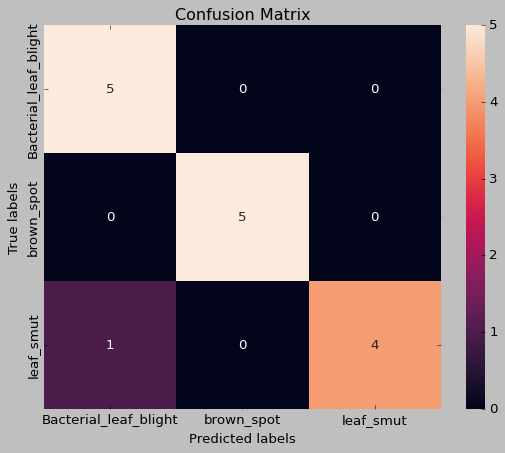

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',ax=ax,xticklabels=['Bacterial_leaf_blight', 'brown_spot', 'leaf_smut'],yticklabels=['Bacterial_leaf_blight', 'brown_spot', 'leaf_smut']); 
#annot=True to annotate cells, ftm='g' to disable scientific notation
ax.set(title='Confusion Matrix',xlabel='Predicted labels',ylabel='True labels');


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=['bacterial_leaf_blight', 'brown_spot', 'leaf_smut'])

print(report)

                       precision    recall  f1-score   support

bacterial_leaf_blight       0.83      1.00      0.91         5
           brown_spot       1.00      1.00      1.00         5
            leaf_smut       1.00      0.80      0.89         5

             accuracy                           0.93        15
            macro avg       0.94      0.93      0.93        15
         weighted avg       0.94      0.93      0.93        15



### <span style="color:purple"> Testing Our Model with Random picture Downloaded from Google </span>

1/1 [==============================] - 0s 51ms/step
Source Label : /content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images_old/bacterial_leaf_blight_4.jpg
Predicted Label: target_bacterial_leaf_blight


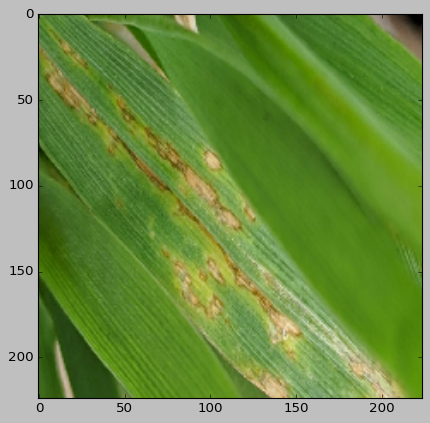

In [ ]:
image_name = '/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images_old/bacterial_leaf_blight_4.jpg'
img = load_img(image_name,target_size=(224,224,3))
img = img_to_array(img)
img = img/255
proba = model.predict(img.reshape(1,224,224,3))
prob_img = np.argsort(proba[0])[:-4:-1]
print("Source Label :",image_name)
print("Predicted Label: {}".format(cols[prob_img[0]]))
plt.imshow(img)

1/1 [==============================] - 0s 22ms/step
Source Label : /content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images_old/Rice Leaf Disease/Brown spot/DSC_0394.jpg
Predicted Label: target_brown_spot


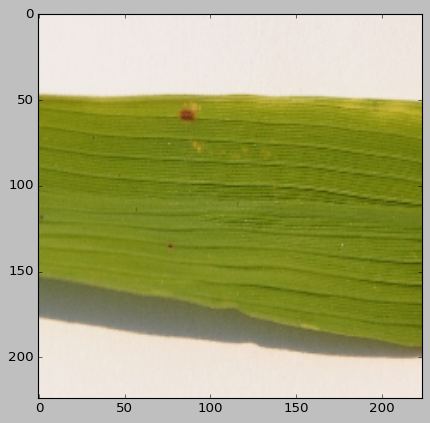

In [ ]:
image_name = '/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images_old/Rice Leaf Disease/Brown spot/DSC_0394.jpg'
img = load_img(image_name,target_size=(224,224,3))
img = img_to_array(img)
img = img/255
proba = model.predict(img.reshape(1,224,224,3))
prob_img = np.argsort(proba[0])[:-4:-1]
print("Source Label :",image_name)
print("Predicted Label: {}".format(cols[prob_img[0]]))
plt.imshow(img)

1/1 [==============================] - 0s 25ms/step
Source Label : /content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images_old/leaf_smut_3.jpg
Predicted Label: target_leaf_smut


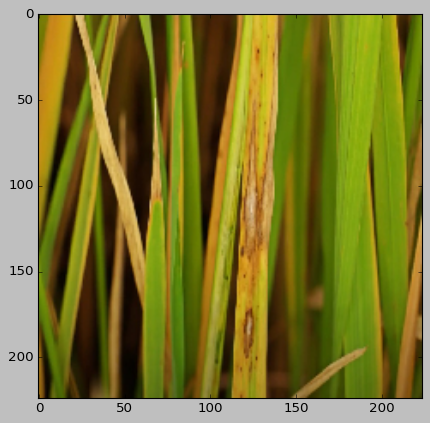

In [ ]:
image_name = '/content/drive/MyDrive/Kuliah/Semester 6/PCVK/Images_old/leaf_smut_3.jpg'
img = load_img(image_name,target_size=(224,224,3))
img = img_to_array(img)
img = img/255
proba = model.predict(img.reshape(1,224,224,3))
prob_img = np.argsort(proba[0])[:-4:-1]
print("Source Label :",image_name)
print("Predicted Label: {}".format(cols[prob_img[0]]))
plt.imshow(img)

### <span style="color:Green"> Model Overview </span>

- [x]  We have used 25 images from bacterial blight,brown spot class and 24 from leaf smut class for training (105 training images)
- [x] We have used 5 images from each class for validation (15 validation images)
- [x] Created an image directory
- [x] Fine tuned a MobileNet model that was pre-trained on imagenet.
- [x] Used Adam optimizer, categorical crossentropy loss and a constant learning rate of 0.0001
- [x] We have used callbacks such as EarlyStopping, ReduceLROnPlateau, ModelCheckpoint,LearningRateScheduler                      
- [x] We didn't use the pre-processing method that was applied to the imagenet images that were used to pre-train Mobilenet. Instead   we normalized all images by dividing by 255.
- [x] Performed image augmentation using the Albumentations library. Image augmentation helped to reduce overfitting, improved our    model performance and helped the model to generalize better.
- [x] We predicted the random images from Google to check the working of our model